In [1]:
pip install folium

In [2]:
pip install re

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
from itertools import combinations
from collections import Counter
import folium
from wordcloud import WordCloud
import seaborn as sns

In [5]:
# Step 1: Preprocessing
# Load the Dataset
input_file = "Dataset .csv"

In [6]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\\u([0-9a-fA-F]{4})', lambda x: chr(int(x.group(1), 16)), text)
        text = re.sub(r'[^\x00-\x7F]+', '', text)  
        text = text.replace('\\', '').strip()
        return text
    return text

In [7]:
data = pd.read_csv(input_file)
data = data.applymap(clean_text)

In [8]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
# Step 2: Inspect data and handle missing values
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Swi

In [10]:
# Find and handle missing data
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())


Missing Values Before Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
# Handle and Replace numeric missing values with mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

In [12]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [13]:
data[col]

0        314
1        591
2        270
3        365
4        229
        ... 
9546     788
9547    1034
9548     661
9549     901
9550     591
Name: Votes, Length: 9551, dtype: int64

In [14]:
# Replace categorical missing values with 'Unknown'
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna('Unknown')

In [15]:
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# LEVEL 3 - Task1

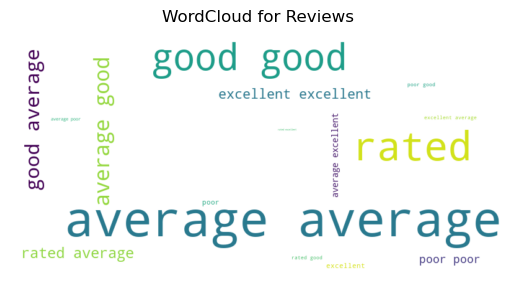

In [16]:
# Task: Restaurant Reviews
if 'Rating text' in data.columns:
    reviews = data['Rating text'].dropna().str.lower().str.split()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(reviews.sum()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Reviews')
    plt.show()

# LEVEL 3 - Task2


Votes Analysis:
Restaurant with the Most Votes:
 Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with the Least Votes:
 Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between Votes and Aggregate Rating: 0.31


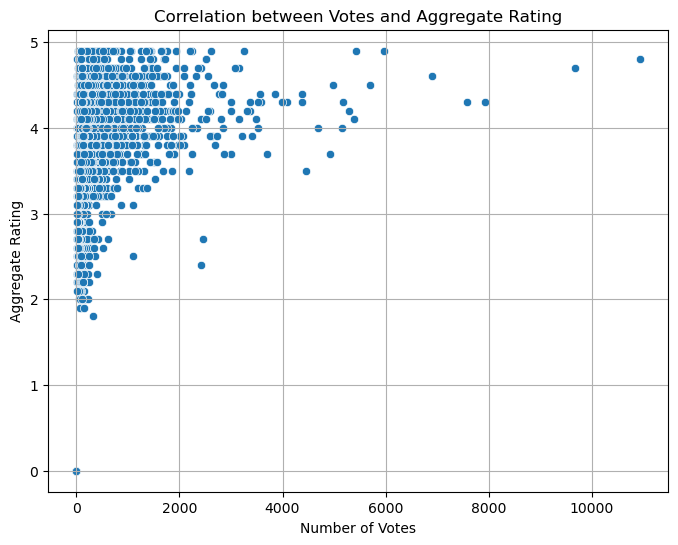

In [17]:
# Task: Votes Analysis
if 'Votes' in data.columns and 'Aggregate rating' in data.columns:
    most_votes = data.loc[data['Votes'].idxmax()]
    least_votes = data.loc[data['Votes'].idxmin()]

    print("\nVotes Analysis:")
    print("Restaurant with the Most Votes:\n", most_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])
    print("\nRestaurant with the Least Votes:\n", least_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

    correlation = data['Votes'].corr(data['Aggregate rating'])
    print(f"\nCorrelation between Votes and Aggregate Rating: {correlation:.2f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
    plt.title('Correlation between Votes and Aggregate Rating')
    plt.xlabel('Number of Votes')
    plt.ylabel('Aggregate Rating')
    plt.grid(True)
    plt.show()
else:
    print("The required columns ('Votes' and 'Aggregate rating') are not available in the data.")

# LEVEL 3 - Task3


Price Range vs Online Delivery and Table Booking:
   Price range  Online Delivery Percentage  Table Booking Percentage
0            1                    0.157741                  0.000225
1            2                    0.413106                  0.076775
2            3                    0.291903                  0.457386
3            4                    0.090444                  0.467577


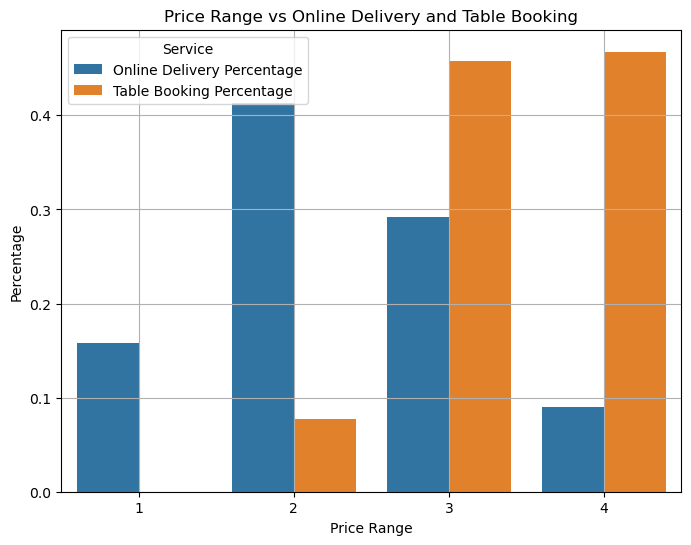


Analysis Insight:
Highest price range (4.0) offers:
- Online Delivery: 9.04%
- Table Booking: 46.76%


In [18]:
# Task: Price Range vs Online Delivery and Table Booking
if {'Price range', 'Has Online delivery', 'Has Table booking'}.issubset(data.columns):

    data['Has Online delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
    data['Has Table booking'] = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    delivery_booking_summary = data.groupby('Price range').agg({
        'Has Online delivery': 'mean',
        'Has Table booking': 'mean'
    }).reset_index()

    delivery_booking_summary.rename(columns={
        'Has Online delivery': 'Online Delivery Percentage',
        'Has Table booking': 'Table Booking Percentage'
    }, inplace=True)

    print("\nPrice Range vs Online Delivery and Table Booking:")
    print(delivery_booking_summary)

    melted_summary = delivery_booking_summary.melt(
        id_vars='Price range',
        value_vars=['Online Delivery Percentage', 'Table Booking Percentage'],
        var_name='Service',
        value_name='Percentage'
    )

    plt.figure(figsize=(8, 6))
    sns.barplot(data=melted_summary, x='Price range', y='Percentage', hue='Service')
    plt.title('Price Range vs Online Delivery and Table Booking')
    plt.xlabel('Price Range')
    plt.ylabel('Percentage')
    plt.legend(title='Service', loc='upper left')
    plt.grid(True)
    plt.show()

    if not delivery_booking_summary.empty:
        higher_price_services = delivery_booking_summary.iloc[-1]
        print("\nAnalysis Insight:")
        print(f"Highest price range ({higher_price_services['Price range']}) offers:")
        print(f"- Online Delivery: {higher_price_services['Online Delivery Percentage'] * 100:.2f}%")
        print(f"- Table Booking: {higher_price_services['Table Booking Percentage'] * 100:.2f}%")
else:
    print("The required columns ('Price range', 'Has Online delivery', 'Has Table booking') are not available in the data.")